## Problem Statement

You are provided with a dataset of ~5k 512x512 images, your program should accept an
512x512 input image and return N images from the provided dataset similar to the input image.

In [ ]:
#Preparing Data Set
import zipfile
from google.colab import drive
import os
import cv2
from google.colab.patches import cv2_imshow
import random
from matplotlib import pyplot as plt
from tqdm import tqdm

#DataProcessing
import numpy as np
import pandas as pd

#Feature Extraction
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler

#TSNE
from sklearn.manifold import TSNE
import seaborn as sn

# Approach 1

## Preparing Data Set

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#!unzip "/content/drive/My Drive/MLTask/dataset.zip" -d "/content/drive/My Drive/MLTask/"

Number of images given - 4738
Number of Invalid files - 0
954.jpg


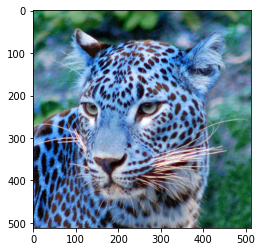

954.jpg - (512, 512, 3)
1509.jpg


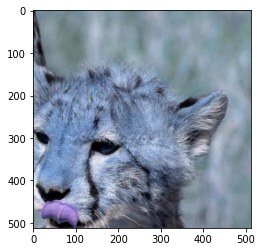

1509.jpg - (512, 512, 3)
303.jpg


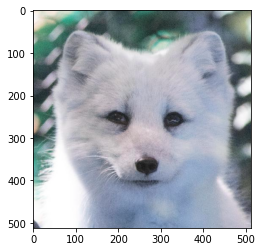

303.jpg - (512, 512, 3)
1247.jpg


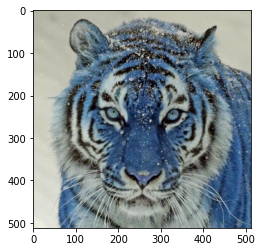

1247.jpg - (512, 512, 3)
3011.jpg


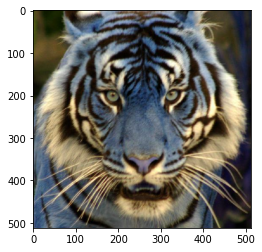

3011.jpg - (512, 512, 3)


In [ ]:
data_path = "/content/drive/My Drive/MLTask/dataset/"
n = os.listdir(data_path)

#Images where given in .jpg format

#Number of samples
print("Number of images given - "+ str(len(n)))

#Checking if there is any invalid extensions
invalid_files = 0
for i in n:
  no,ext = i.split(".")
  if ext != "jpg":
    print(i)
    invalid_files+=1
print("Number of Invalid files - "+str(invalid_files))

#Checking dimesnions of the images randomly
for i in range(5):
  sample_image = random.choice(n)
  print(sample_image)
  img = cv2.imread(data_path+sample_image)
  plt.imshow(img)
  plt.show()
  #cv2_imshow(img)
  print(str(sample_image)+" - "+str(img.shape))

## Feature Extraction

In [ ]:
def VGG_16():
  model = Sequential()
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  

  return model


In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = datagen.flow_from_directory(
    "/content/drive/My Drive/MLTask/", target_size=(224, 224), color_mode='rgb', classes=None,
    class_mode=None, batch_size=1, shuffle=False
)

Found 4738 images belonging to 1 classes.


In [ ]:
model = VGG_16()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
#Getting image filenames

img_id = []
for i in train_generator.filenames:
  img_id.append(i[8:-4])
print(len(img_id))

4738


In [ ]:
features = model.predict_generator(train_generator, 4738 // 1)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
features.shape

(4738, 25088)

In [ ]:
features

array([[2.4206177e-03, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.4131423e-03, 1.6508271e-03],
       [2.9889154e-03, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.2008997e-03, 1.3200233e-03],
       [1.9707168e-03, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.7191648e-03, 2.4025037e-03],
       ...,
       [1.9798349e-03, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        9.5123937e-04, 9.1451436e-04],
       [1.6006811e-03, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.3420200e-03, 1.6236051e-03],
       [1.1203061e-03, 0.0000000e+00, 0.0000000e+00, ..., 9.9077821e-05,
        1.2107126e-03, 1.3631115e-03]], dtype=float32)

In [ ]:
#Saving extracted features
#features_raw_01 - 12/08/2020
np.save(open('/content/drive/My Drive/MLTask/features_raw_01.npy', 'wb'), features)

#coresponding image id
np.save(open('/content/drive/My Drive/MLTask/image_01.npy', 'wb'), img_id)

In [ ]:
#loading features
'''
features = np.load('/content/drive/My Drive/MLTask/features_raw_01.npy')
img_id = np.load('/content/drive/My Drive/MLTask/image_01.npy')

In [ ]:
#Standardising Features
standardized_features = StandardScaler().fit_transform(features)
print(standardized_features.shape)

(4738, 25088)


In [ ]:
#Saving extracted features - data standardised
#features_std_01 - 12/08/2020
np.save(open('/content/drive/My Drive/MLTask/features_std_01.npy', 'wb'), standardized_features)

In [ ]:
#Loading standadised features
'''
standardized_features = np.load('/content/drive/My Drive/MLTask/features_std_01.npy')

## Applying TSNE to the extracted features


### TSNE (perplexity - 30)

In [ ]:
tsne_model_01 = TSNE(n_components=2, random_state=0)
tsne_data_01 = tsne_model_01.fit_transform(standardized_features)

In [ ]:
#tsne_01 - 12/08/2020
np.save(open('/content/drive/My Drive/MLTask/tsne_01.npy', 'wb'), tsne_data_01)

In [ ]:
#loading tsne_01
'''
tsne_data = np.load('/content/drive/My Drive/MLTask/tsne_01.npy')

In [ ]:
tsne_data_01.shape

(4738, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


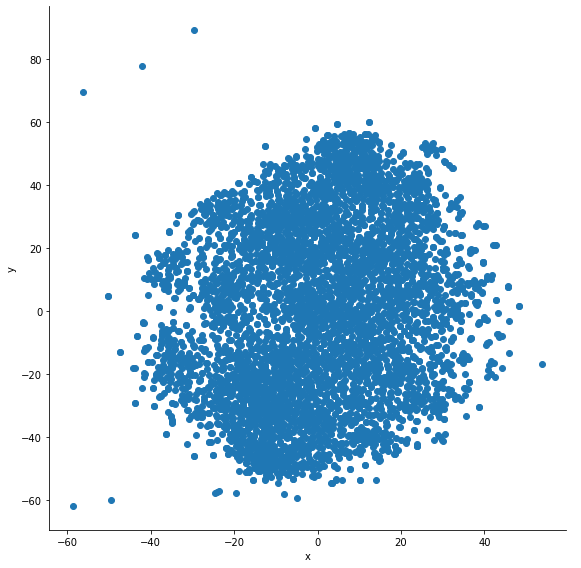

In [ ]:
tsne_df_01 = pd.DataFrame(data=tsne_data_01, columns=("x", "y"))
sn.FacetGrid(tsne_df_01, size=8).map(plt.scatter,'x','y').add_legend()
plt.show()

### TSNE - perplexity=50

In [ ]:
tsne_model_02 = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data_02 = tsne_model_02.fit_transform(standardized_features)

In [ ]:
#tsne_02 - 12/08/2020
np.save(open('/content/drive/My Drive/MLTask/tsne_02.npy', 'wb'), tsne_data_02)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


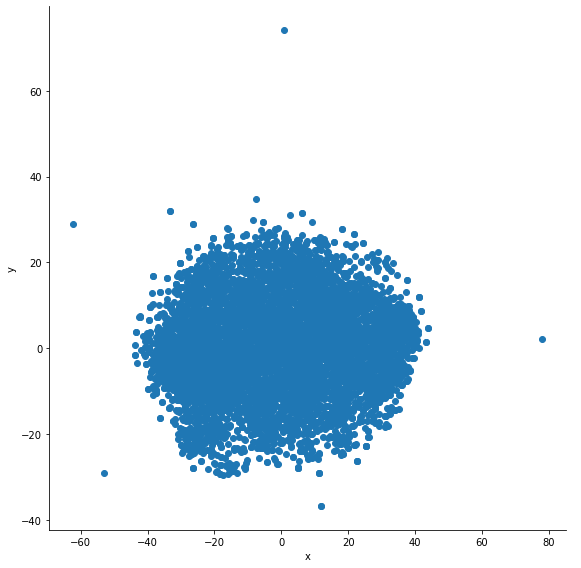

In [ ]:
tsne_df_02 = pd.DataFrame(data=tsne_data_02, columns=("x", "y"))
sn.FacetGrid(tsne_df_02, size=8).map(plt.scatter,'x','y').add_legend()
plt.show()

### TSNE - Perplexity = 10

In [ ]:
tsne_model_03 = TSNE(n_components=2, random_state=0, perplexity=10)
tsne_data_03 = tsne_model_03.fit_transform(standardized_features)

In [ ]:
#tsne_03 - 12/08/2020
np.save(open('/content/drive/My Drive/MLTask/tsne_03.npy', 'wb'), tsne_data_03)

In [ ]:
#loading tsne_03

tsne_data_03 = np.load('/content/drive/My Drive/MLTask/tsne_03.npy')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


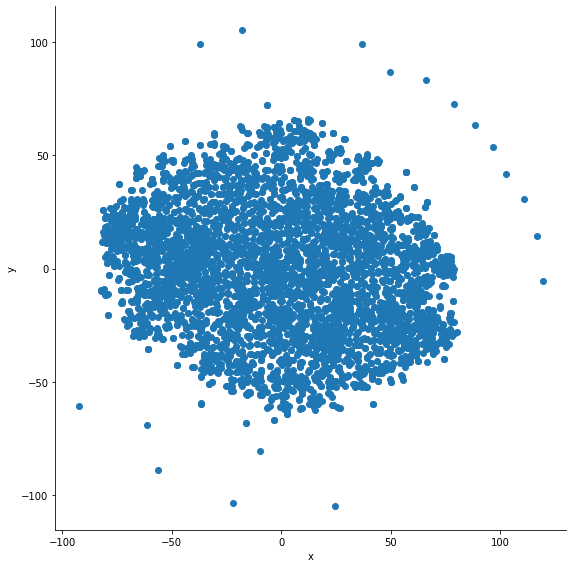

In [ ]:
tsne_df_03 = pd.DataFrame(data=tsne_data_03, columns=("x", "y"))
sn.FacetGrid(tsne_df_03, size=8).map(plt.scatter,'x','y').add_legend()
plt.show()

## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

clusters=list(range(1,21))
kmn = []
sse = []
for c in clusters:
  kmeans = KMeans(n_clusters=c, random_state=0).fit(tsne_data_03)
  kmn.append(kmeans.labels_)
  sse.append(kmeans.inertia_)

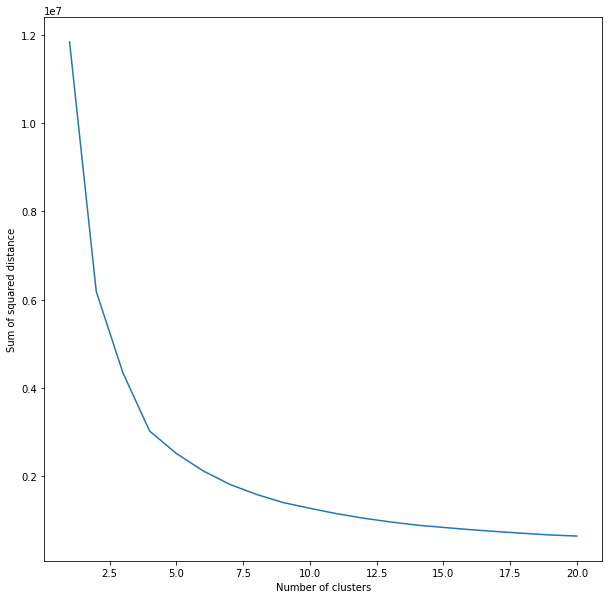

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(clusters, sse)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance');

### When Number of clusters = 7

In [ ]:
huee = pd.DataFrame(data=kmn[7])

km_data = pd.DataFrame()
tsne_df = pd.DataFrame(data=tsne_data_03, columns=("x", "y"))

km_data = pd.concat([tsne_df,huee], axis=1, ignore_index=True)
km_data.columns=["x","y","label"]
print(km_data.shape)
km_data.head()

(4738, 3)


,x,y,label
0,-51.416279,-25.729170,0
1,-5.302199,13.636371,5
2,36.354622,30.353014,2
3,2.566905,-52.817924,7
4,-2.051786,-35.549149,7


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


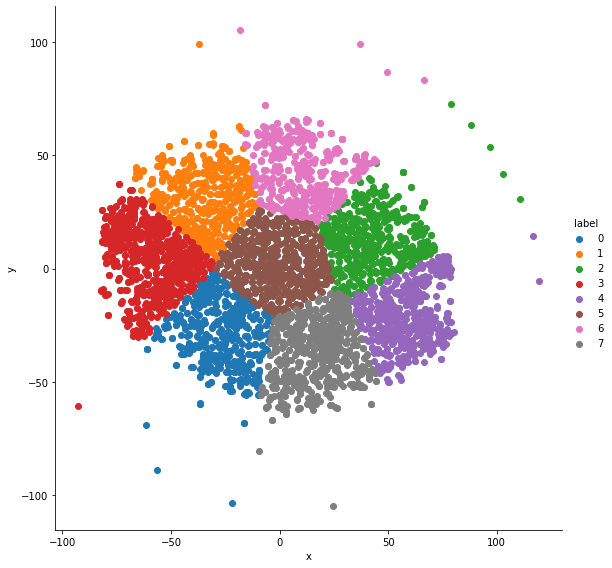

In [ ]:
sn.FacetGrid(km_data,hue='label', size=8).map(plt.scatter,'x','y').add_legend()
plt.show()

### When number of clusters = 5

In [ ]:
huee = pd.DataFrame(data=kmn[4])

km_data = pd.DataFrame()
tsne_df = pd.DataFrame(data=tsne_data_03, columns=("x", "y"))

km_data = pd.concat([tsne_df,huee], axis=1, ignore_index=True)
km_data.columns=["x","y","label"]
print(km_data.shape)
km_data.head()

(4738, 3)


,x,y,label
0,-51.416279,-25.729170,1
1,-5.302199,13.636371,4
2,36.354622,30.353014,0
3,2.566905,-52.817924,2
4,-2.051786,-35.549149,2


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


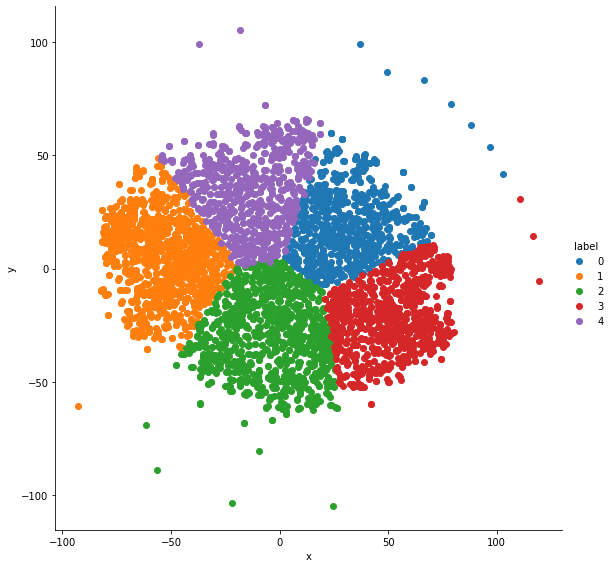

In [ ]:
sn.FacetGrid(km_data,hue='label', size=8).map(plt.scatter,'x','y').add_legend()
plt.show()

### Displaying Clustered Images

In [ ]:
img_id
img_id = pd.DataFrame(data=img_id)

In [ ]:
km = pd.DataFrame()
km = pd.concat([img_id,km_data], axis=1, ignore_index=True)
km.columns=("id","x","y","label")
km.head()

,id,x,y,label
0,0,-51.416279,-25.729170,1
1,1,-5.302199,13.636371,4
2,10,36.354622,30.353014,0
3,100,2.566905,-52.817924,2
4,1000,-2.051786,-35.549149,2


In [ ]:
clust = []
for i in range(0,5):
  clust_=[]
  val = km.loc[km['label'] == i]
  for j in val['id']:
    clust_.append(j)
  clust.append(clust_)

print("Done!!!")

Done!!!


In [ ]:
#Displaying number of images in each cluster

for i in range(len(clust)):
  n=0
  for j in range(len(clust[i])):
    n+=1
  print("Number of img in cluster [{}] is {}".format(i,n))

Number of img in cluster [0] is 820
Number of img in cluster [1] is 1077
Number of img in cluster [2] is 1090
Number of img in cluster [3] is 916
Number of img in cluster [4] is 835


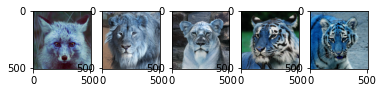

**************************************************


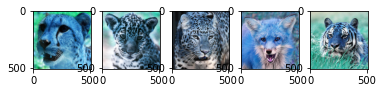

**************************************************


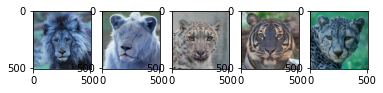

**************************************************


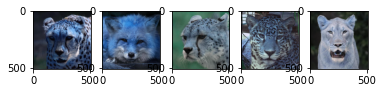

**************************************************


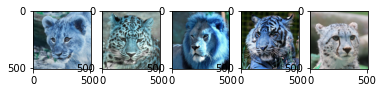

**************************************************


In [ ]:
## Sampling random images from each clusters

data_path = data_path = "/content/drive/My Drive/MLTask/dataset/"
for i in range(len(clust)):
  for j in range(5):
    img_choice = random.choice(clust[i])
    sample_image = str(img_choice)+".jpg"
    img = cv2.imread(data_path+sample_image)
    plt.subplot(1, 5, j+1)
    plt.imshow(img)
  plt.show()
  print("*"*50)


## Observation

The resuts are not great when we use features extracted from vgg16